<a href="https://colab.research.google.com/github/luisfelipe100/PCD/blob/main/PCD_Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Read the .txt file into a DataFrame
df = pd.read_csv("/content/ecommerceDataset.csv", header=None, usecols=[0, 1])
df.columns = ["class", "description"]
# Display the first few rows
print(df.head())


       class                                        description
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...


In [2]:
df['class'].value_counts()

,count
class,
Household,19313
Books,11820
Electronics,10621
Clothing & Accessories,8670


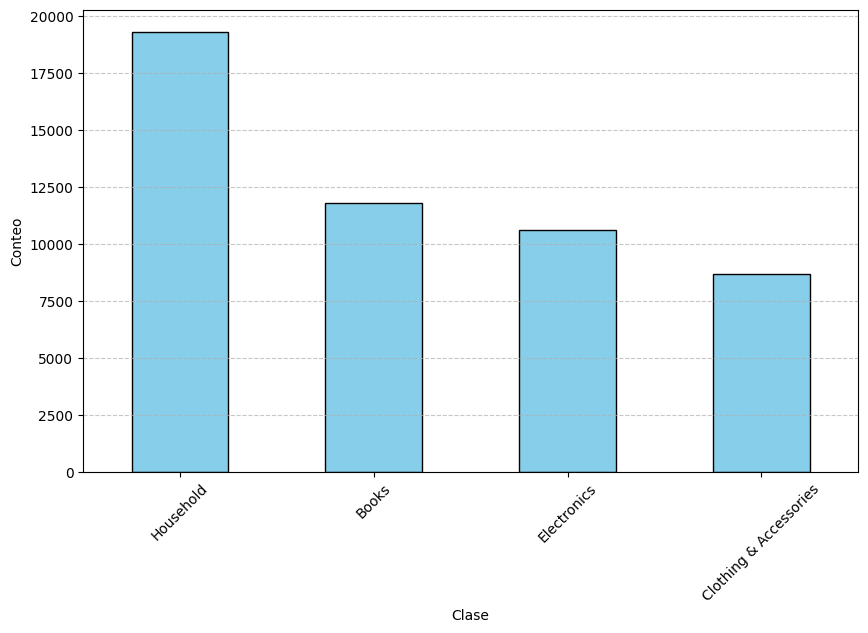

In [3]:
import matplotlib.pyplot as plt

# Get the frequency table
class_counts = df['class'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel("Clase")
plt.ylabel("Conteo")
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [4]:
X, y = df['description'], df['class']

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("punkt_tab")
nltk.download("stopwords")

def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return " ".join(stemmed_tokens)

X_preprocessed = [preprocess_text(text) for text in X]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_preprocessed, y)

# label encode the target variable
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


In [7]:
# create a count vectorizer object
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_preprocessed)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [8]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_preprocessed)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X_preprocessed)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X_preprocessed)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [9]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_y)

In [11]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)


NB, Count Vectors:  0.951451689671585
NB, WordLevel TF-IDF:  0.9459781056639696
NB, N-Gram Vectors:  0.8532444867523401
NB, CharLevel Vectors:  0.9167063303188958


In [13]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)


LR, Count Vectors:  0.9758051721402506
LR, WordLevel TF-IDF:  0.967396477867682
LR, N-Gram Vectors:  0.9007615421227987
LR, CharLevel Vectors:  0.9553387275900365


In [14]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)


SVM, N-Gram Vectors:  0.9136918927494844


In [15]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print("SVM, Count Vectors: ", accuracy)

SVM, Count Vectors:  0.9551007456766619


In [16]:
# SVM on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM, WordLevel TF-IDF: ", accuracy)

SVM, N-Gram Vectors:  0.9783436458829129


In [17]:
# SVM on Character Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("SVM, CharLevel Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.973504680310963
